In [1]:
import pandas as pd
import requests
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.size"] = 16

In [3]:
# http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

# load red wine quality data, downloading on the first time if necessary:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
file_name = "winequality-red.csv"

if not os.path.exists(file_name):
    print("DOWNLOAD")
    df = pd.read_csv(url, sep=";")
    df.to_csv(file_name, index=False, sep=",")

df_red = pd.read_csv(file_name)

# load white wine quality data, downloading on the first time if necessary:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
file_name = "winequality-white.csv"

if not os.path.exists(file_name):
    print("DOWNLOAD")
    df = pd.read_csv(url, sep=";")
    df.to_csv(file_name, index=False, sep=",")

df_white = pd.read_csv(file_name)

In [4]:
len(df_red)

1599

In [5]:
len(df_white)

4898

In [6]:
df = df_red.append(df_white, ignore_index=True)

In [7]:
len(df)

6497

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
mean_df = df.groupby(df['quality']).mean()

In [10]:
mean_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [11]:
scaler = StandardScaler()

In [12]:
scaled_df = pd.DataFrame(scaler.fit_transform(mean_df), columns = mean_df.columns)

In [13]:
scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.955027,1.783286,-1.098524,0.253671,1.591599,1.493276,1.168327,1.115088,0.578042,-0.310540,-0.796168
1,-0.004092,1.089840,-1.345039,-1.341623,0.475814,-2.044029,-1.843920,0.528368,-0.263872,-0.339121,-0.838830
2,0.127496,0.287019,-0.340060,1.327850,0.778817,-0.216215,0.974927,1.182677,-0.891967,0.526634,-1.257179
3,-0.391554,-0.602752,0.110109,0.916429,0.088176,-0.039608,0.095841,0.351780,-0.713000,0.783010,-0.340857
4,-0.559179,-0.897141,0.427468,-0.406744,-0.495735,-0.181037,-1.023550,-0.570393,-0.378559,1.386833,0.634961
5,-1.578677,-0.871176,0.364320,0.646554,-0.768351,0.601722,0.437114,-0.964639,-0.535647,-0.053850,0.992742
6,0.450979,-0.789076,1.881726,-1.396137,-1.670320,0.385891,0.191260,-1.642880,2.205003,-1.992965,1.605331


In [14]:
scaled_df["quality"] = range(3,10)
scaled_df = scaled_df.set_index("quality")

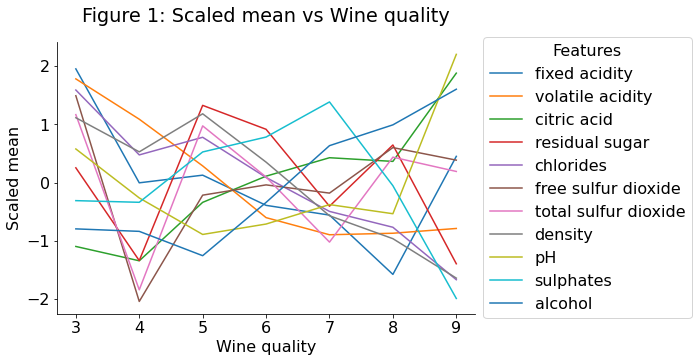

In [15]:
ax = scaled_df.plot.line(figsize=(7.5,5))
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).set_title("Features")
ax.set_title("Figure 1: Scaled mean vs Wine quality", pad=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Wine quality")
ax.set_ylabel("Scaled mean")
None

In [16]:
# Subset of columns
xcols = ["volatile acidity","citric acid","chlorides","density","sulphates","alcohol"]

In [17]:
inertia_list = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(df[xcols])
    inertia_list.append(km.inertia_)

In [18]:
inertia_list

[9706.084794457674,
 3077.5594332705873,
 1627.681925170754,
 1160.222045921594,
 957.4258733104224,
 807.5179692338671,
 717.9537282963918,
 654.2904700664765,
 611.4785460057867,
 561.9849313392618]

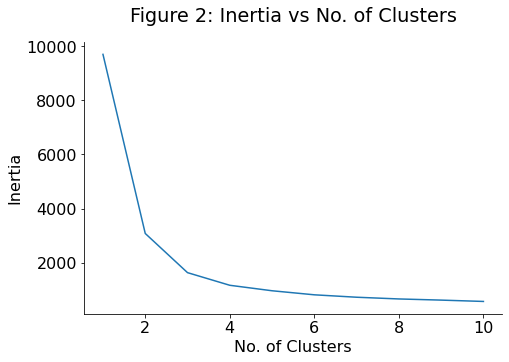

In [19]:
ax = pd.Series(inertia_list, index=range(1, 11)).plot.line(figsize=(7.5,5))
ax.set_title("Figure 2: Inertia vs No. of Clusters", pad=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Inertia')
None

In [20]:
ycol = "quality"
# xcols = list(mean_df.columns) #all columns for comparison
train, test = train_test_split(df, random_state=3)
train.shape, test.shape

((4872, 12), (1625, 12))

In [21]:
stages = [("std", StandardScaler()), ("lr", LogisticRegression(max_iter=200))]
p = Pipeline(stages)

In [22]:
p.fit(train[xcols], train[ycol])

Pipeline(steps=[('std', StandardScaler()),
                ('lr', LogisticRegression(max_iter=200))])

In [23]:
print("Score", p.score(test[xcols], test[ycol]))

Score 0.544


In [24]:
print("Recall", recall_score(test[ycol], p.predict(test[xcols]), average=None))

Recall [0.         0.         0.59962756 0.70903955 0.21978022 0.
 0.        ]


In [25]:
df["quality"].groupby(df['quality']).count()[2:5].sum() / len(df)

0.9316607665076189

In [26]:
p["lr"].coef_[0]

array([ 0.78182699, -0.00513134,  0.5659944 ,  0.01903425, -0.76177826,
       -0.39204921])

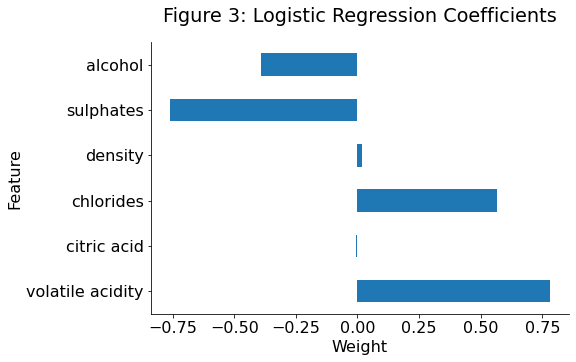

In [27]:
ax = pd.Series(p["lr"].coef_[0], index = xcols).plot.barh(figsize=(7.5,5))
ax.set_xlabel("Weight")
ax.set_ylabel("Feature")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 3: Logistic Regression Coefficients", pad=20)
None